# Kernal Regression

### 生成学习数据

In [28]:
import numpy as np

def generate_data(num, d=3, intercept=0, std=1):
    coef = np.random.uniform(0, 50, size=d)
    coef[-1] = intercept

    y = []
    X = np.random.uniform(-100, 100, size=(num, 1))
    for x in X:
        val = np.polyval(coef, x) + np.random.normal(0, std)
        y.append(val)
    y = np.array(y)

    return X, y, coef

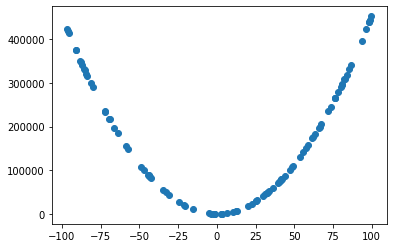

In [35]:
import matplotlib.pyplot as plt

x, y, _ = generate_data(100)

plt.scatter(x, y)
plt.show()

### 定义[RBFKernel](./kernels.ipynb#Radial-basis-%E6%A0%B8%E5%87%BD%E6%95%B0)

In [151]:
def pairwise_l2_distances(X, Y):
    D = -2 * X @ Y.T + np.sum(Y ** 2, axis=1) + np.sum(X ** 2, axis=1)[:, np.newaxis]
    D[D < 0] = 0  # clip any value less than 0 (a result of numerical imprecision)
    return np.sqrt(D)

def RBF_kernel(X, Y, sigma):
    sigma = np.sqrt(X.shape[1] / 2) if sigma is None else sigma
    return np.exp(-0.5 * pairwise_l2_distances(X / sigma, Y / sigma) ** 2)

### 分离训练集和测试集

In [48]:
def train_test_split(x, y, split_size = 0.7):
    m = len(x)
    shuffle_idx = np.random.permutation(np.arange(m))
    train_size = int(m * split_size)
    x_train = x[shuffle_idx[:train_size]]
    y_train = y[shuffle_idx[:train_size]]
    x_test = x[shuffle_idx[train_size:]]
    y_test = y[shuffle_idx[train_size:]]
    
    return x_train, y_train, x_test, y_test

### 训练

In [89]:
def fit(x, y):
    x_train, y_train, x_test, y_test = train_test_split(x, y)
    sim = RBF_kernel(x_train, x_test, 1)
    y_pred = np.sum(sim.T @ y_train, axis = 0) / np.sum(sim, axis=0)
    loss = np.mean((y_test.flatten() - y_pred.flatten()) ** 2)
    return loss

In [165]:
print(RBF_kernel(np.arange(9).reshape(3, 3), np.ones((6,3)), 0.1))

[[ 14.14213562  14.14213562  14.14213562  14.14213562  14.14213562
   14.14213562]
 [ 53.85164807  53.85164807  53.85164807  53.85164807  53.85164807
   53.85164807]
 [104.88088482 104.88088482 104.88088482 104.88088482 104.88088482
  104.88088482]]
[[3.72007598e-44 3.72007598e-44 3.72007598e-44 3.72007598e-44
  3.72007598e-44 3.72007598e-44]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
